In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [59]:
df = pd.read_csv('iris.csv')

In [60]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df.shape

(150, 5)

In [62]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [64]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [65]:
X = df.drop(['species'],axis=1)
y = df['species']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=10)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=10)

In [71]:
rfc.score(X_train,y_train)

1.0

In [72]:
rfc.score(X_test, y_test)

0.9555555555555556

In [73]:
pred = rfc.predict(X_test)
pred

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        17
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [75]:
accuracy_score(y_test,pred)

0.9555555555555556

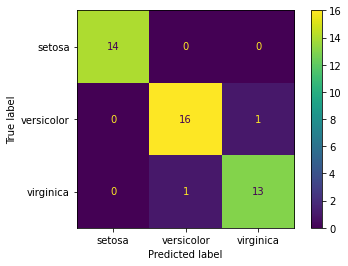

In [43]:
plot_confusion_matrix(rfc, X_test, y_test)

In [44]:
pd.DataFrame(index=X.columns, data =rfc.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
petal_width,0.677024
petal_length,0.271303
sepal_width,0.031083
sepal_length,0.020591


In [45]:
from sklearn.linear_model import LogisticRegressionCV

In [46]:
log_model = LogisticRegressionCV()

In [47]:
log_model.fit(X_train, y_train)

LogisticRegressionCV()

In [48]:
log_model.score(X_train, y_train)

0.9809523809523809

In [57]:
log_model.score(X_test, y_test)

1.0

In [52]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score

In [53]:
y_pred = log_model.predict(X_test)

In [54]:
confusion_matrix(y_pred, y_test)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

In [55]:
accuracy_score(y_pred, y_test)

1.0

In [56]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [76]:
print("Accuracy for Random Forest : ",accuracy_score(y_test,pred))
print("Accuracy for Logistic Regression : ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest :  0.9555555555555556
Accuracy for Logistic Regression :  1.0


In [77]:
new_data = [[5.1,3.5,1.4,0.2 ]]

### Predicting Flower: 

In [79]:
rfc.predict(new_data)

array(['setosa'], dtype=object)

In [78]:
log_model.predict(new_data)

array(['setosa'], dtype=object)